In [197]:
import pandas as pd
cl = ['Sample code number','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesio','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']
df = pd.read_csv('BreastCancerWc.csv', names=cl)

In [198]:
df

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesio,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [199]:
(df.astype(str)=='?').values.sum()

16

In [200]:
df.replace('?', pd.NA, inplace=True)

In [201]:
(df.astype(str)=='?').values.sum()

0

In [202]:
df.isna().sum()

Sample code number              0
Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesio                0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [204]:
df = df.apply(pd.to_numeric, errors='coerce')

In [205]:
for i in df.columns:
    mean_value = df[i].mean()
    df[i] = df[i].fillna(mean_value)

In [206]:
df.isna().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesio               0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [207]:
import matplotlib.pyplot as plt

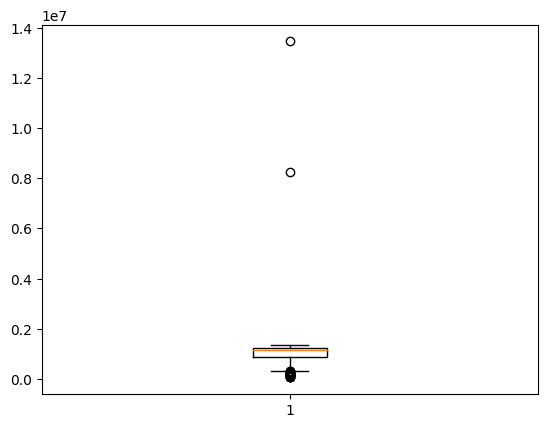

In [209]:
plt.boxplot(df['Sample code number'])
plt.show()

In [210]:
Q1 = df['Sample code number'].quantile(0.25)
Q1

870688.5

In [211]:
Q3 = df['Sample code number'].quantile(0.75)
Q3

1238298.0

In [212]:
IQR = Q3 - Q1
IQR

367609.5

In [213]:
ul = Q3 + 1.5*IQR
ul

1789712.25

In [214]:
ll = Q1 - 1.5*IQR
ll

319274.25

In [216]:
newdf = df[(df['Sample code number']>ll)&(df['Sample code number']<ul)]

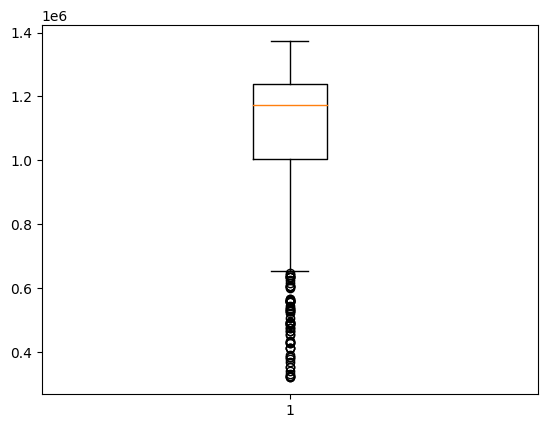

In [217]:
plt.boxplot(newdf['Sample code number'])
plt.show()

In [218]:
newdf.shape

(676, 11)

In [219]:
df_norm = (newdf - newdf.min())/(newdf.max() - newdf.min())

In [220]:
df_norm.shape

(676, 11)

In [221]:
# Split the data into features (X) and target variable (y)
X = df_norm.drop('Class', axis=1)
y = df_norm['Class']


In [222]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=25)


In [223]:
from sklearn.linear_model import LogisticRegression

# Build and train the regression model
regression_model = LogisticRegression()


In [224]:
y_train

596    0.0
308    1.0
27     0.0
415    0.0
388    0.0
      ... 
333    1.0
143    0.0
492    0.0
334    1.0
132    1.0
Name: Class, Length: 507, dtype: float64

In [225]:

regression_model.fit(X_train, y_train)


LogisticRegression()

In [226]:
from sklearn.naive_bayes import GaussianNB

# Build and train the Naïve Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)


GaussianNB()

In [227]:
# Predict tumor diagnosis using the regression model
regression_predictions = regression_model.predict(X_test)

# Predict tumor diagnosis using the Naïve Bayes model
nb_predictions = nb_model.predict(X_test)


In [228]:
from sklearn.metrics import accuracy_score

# Calculate accuracy scores
regression_accuracy = accuracy_score(y_test, regression_predictions)
nb_accuracy = accuracy_score(y_test, nb_predictions)

# Print the accuracy scores
print("Regression Model Accuracy:", regression_accuracy)
print("Naïve Bayes Model Accuracy:", nb_accuracy)


Regression Model Accuracy: 0.9526627218934911
Naïve Bayes Model Accuracy: 0.9349112426035503
